# Model: Predicting Viral Videos

### A classification model to predict whether a video goes viral (views > 1M).

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [5]:
df=pd.read_csv('/home/mocha/projects/data/data/USvideos.csv')

am creating target column (viral = 1 if views > 1M else 0)

In [6]:
df['viral'] = (df['views'] > 1_000_000).astype(int)

now am selecting useful features for the model

In [7]:
features = ['likes', 'dislikes', 'comment_count', 'category_id']
X = df[features]
y = df['viral']

let us  Handle missing values

In [8]:
X = X.fillna(0)

Split into train & test sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


next am going to train a RandomForest model

In [10]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Let  Make predictions

In [11]:
y_pred = model.predict(X_test)

am now going to evaluate model

In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9457875457875458

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      4922
           1       0.94      0.93      0.93      3268

    accuracy                           0.95      8190
   macro avg       0.94      0.94      0.94      8190
weighted avg       0.95      0.95      0.95      8190



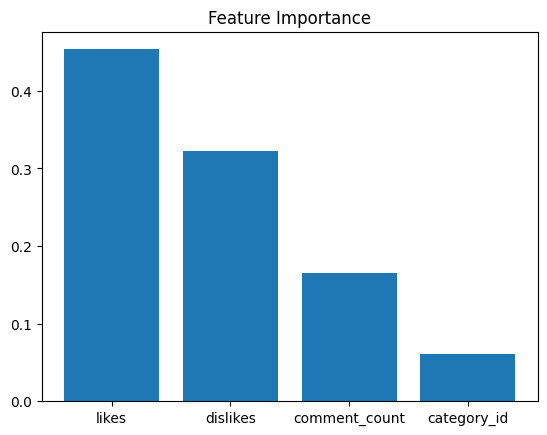

In [13]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
plt.bar(features, importances)
plt.title("Feature Importance")
plt.show()
